In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
import os

In [6]:
os.chdir('../')

# data transformation

In [21]:
cab_data=pd.read_csv('dataset/cab_rides.csv')
weather_data=pd.read_csv('dataset/weather.csv')

In [22]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [23]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [24]:
cab_data.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

[]

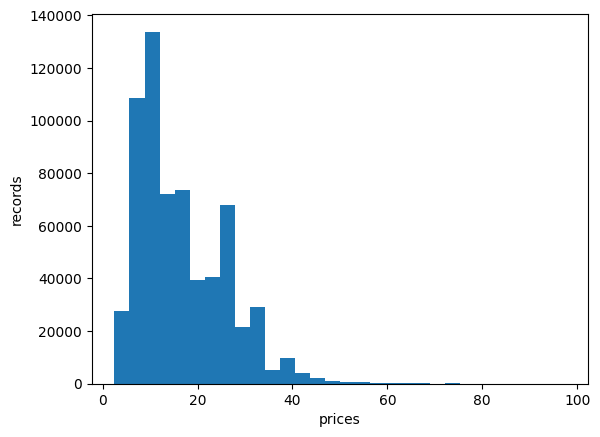

In [28]:
plt.hist(cab_data['price'].dropna(),bins=30)
plt.xlabel('prices')
plt.ylabel('records')
plt.plot()

In [29]:
# drop the price rows
cab_data.dropna(inplace=True)
cab_data.isna().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [30]:
# clean weather data
weather_data.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

[]

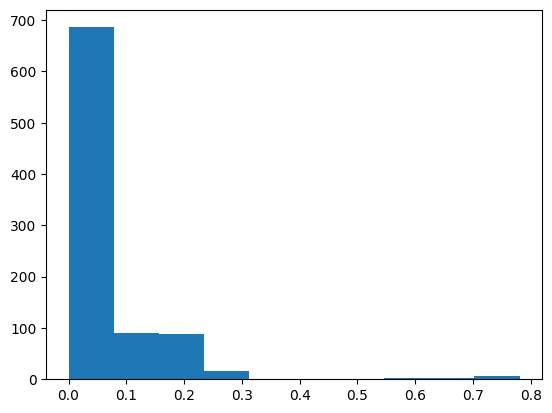

In [33]:
# check the distribution of rain
plt.hist(weather_data['rain'].dropna(),bins=10)
plt.plot()

In [36]:
# drop the values 
weather_data['rain'].fillna(0,inplace=True)

C:\Users\26amr\AppData\Local\Temp\ipykernel_31460\3405471692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data['rain'].fillna(0,inplace=True)


[]

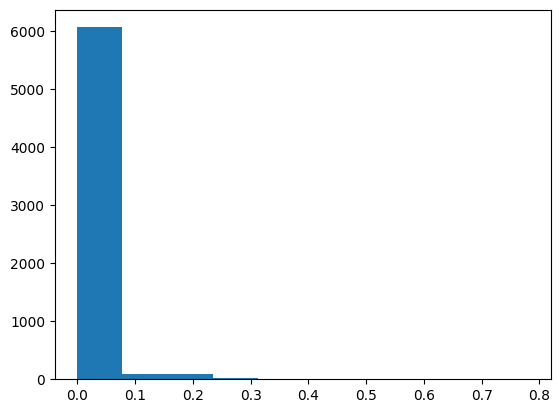

In [38]:
# check the distribution of rain
plt.hist(weather_data['rain'],bins=10)
plt.plot()

# analyse the cab data 

In [42]:
print(cab_data.info())
cab_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          637976 non-null  float64
 1   cab_type          637976 non-null  object 
 2   time_stamp        637976 non-null  int64  
 3   destination       637976 non-null  object 
 4   source            637976 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   id                637976 non-null  object 
 8   product_id        637976 non-null  object 
 9   name              637976 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 53.5+ MB
None


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


C:\Users\26amr\AppData\Local\Temp\ipykernel_31460\3353451214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cab_data['product_id'].value_counts().index, y=cab_data['product_id'].value_counts().values,palette='viridis')


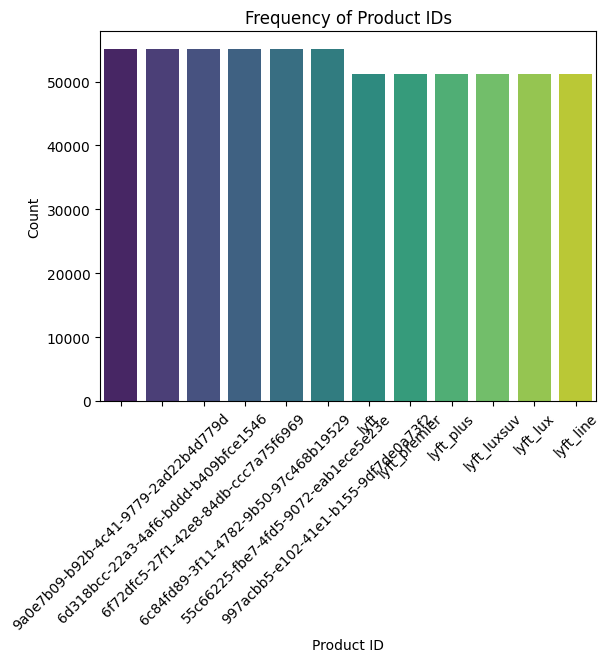

In [ ]:
# identify product id to see if relevant - equaal count not so impotant
sns.barplot(x=cab_data['product_id'].value_counts().index, y=cab_data['product_id'].value_counts().values,palette='viridis')
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.title("Frequency of Product IDs")
plt.xticks(rotation=45)
plt.show()

In [59]:
cab_data=cab_data.drop(columns=['product_id','id'])
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [ ]:
# conver the timestamp to date time 